In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
def uploadSurvey():
    """
    UPLOADS THE SURVEY DATA AND OUTPUTS A PANDAS DF
    """
    # Read the Excel files
    script_dir = os.getcwd()

    # Create the relative path to the PatternsData directory
    directory_path = os.path.join(script_dir, "PatternsData")
    morning = pd.read_excel(directory_path + '/morningPatterns.xlsx')
    noon = pd.read_excel(directory_path + '/noonPatterns.xlsx')
    evening = pd.read_excel(directory_path +  '/eveningPatterns.xlsx')

    # Fix morning productivity column
    morning['productivity'].replace({"likely": "10", "neutral": "5", "unlikely": "1", "I don't know": np.nan}, inplace=True)
    morning['productivity'] = morning['productivity'].astype(float)

    # Add time of day indicators
    morning['TOD'] = 0
    noon['TOD'] = 1
    evening['TOD'] = 2

    # Create day dataframe combining morning, noon, and evening
    day = pd.concat([morning, noon, evening], axis=0)

    return day

IF YOU WANT TO GRAPH THE AVERAGE SURVEY RESULTS FOR ALL USERS, RUN THE FUNCTIONS BELOW

In [3]:
def summarizedData(allData):
    # Group by name and calculate the mean
    grouped = allData.groupby('name').agg({
        'sad_happy': 'mean',
        'stressed_relaxed': 'mean',
        'unmotivated_motivated': 'mean',
        'distracted_focused': 'mean',
        'unaccomplished_accomplished': 'mean',
        'bored_interested': 'mean',
        'angry_calm': 'mean',
        'productivity': 'mean'
    }).reset_index()

    # Adjust the productivity column
    grouped['productivity'] = grouped['productivity'] / 2

    return grouped

In [4]:
def makeTall(data):
    # Melt the dataframe
    users_tall = pd.melt(data, id_vars='name', value_name='response', var_name='question')

    return users_tall

In [5]:
def graphSummary(users_tall):

    # List of unique questions for color mapping
    questions = users_tall['question'].unique()

    # Create a color map
    colors = plt.cm.viridis(np.linspace(0, 1, len(questions)))

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # For each question, plot a line for each name
    for idx, question in enumerate(questions):
        subset = users_tall[users_tall['question'] == question]
        ax.plot(subset['name'], subset['response'], label=question, color=colors[idx])

    # Set up plot aesthetics
    ax.legend(title='Question', loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel('User')
    ax.set_ylabel('Value (1-5)')
    ax.set_title('Plot of survey results by user and question')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()


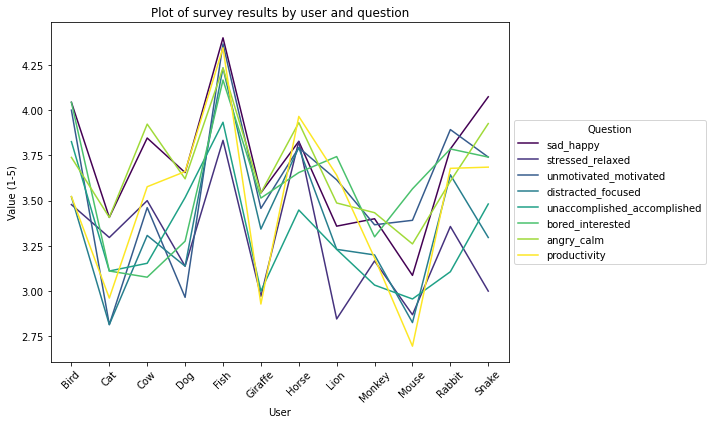

In [6]:
#Get the survey data using the function above
def graphAverageSurveyResult():
    graphSummary(makeTall(summarizedData(uploadSurvey())))

graphAverageSurveyResult()
